<a href="https://colab.research.google.com/github/harshaanth/DS_Employee_Attrition_Prediction/blob/main/Employee_Attrition_with_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predicting Employee Attrition with Class Probability Estimation (Logistic Regression)

### Context:
McCurr Healthcare Consultancy is an MNC that has thousands of employees spread out across the globe. The company believes in hiring the best talent available and retaining them for as long as possible. A huge amount of resources are spent on retaining existing employees through various initiatives. The Head of People Operations wants to bring down the cost of retaining employees. For this, he proposes limiting the incentives to only those employees who are at risk of attrition. As a recently hired Data Scientist in the People Operations Department, you have been asked to identify patterns in characteristics of employees who leave the organization. Also, you have to use this information to predict if an employee is at risk of attrition. This information will be used to target them with incentives.

### Objective :

* To identify the different factors that drive attrition
* To make a model to predict if an employee will attrite or not


### Dataset :
The data contains demographic details, work-related metrics and attrition flag.

* **EmployeeNumber** - Employee Identifier
* **Attrition** - Did the employee attrite?
* **Age** - Age of the employee
* **BusinessTravel** - Travel commitments for the job
* **DailyRate** - Data description not available**
* **Department** - Employee Department
* **DistanceFromHome** - Distance from work to home (in km)
* **Education** - 1-Below College, 2-College, 3-Bachelor, 4-Master,5-Doctor
* **EducationField** - Field of Education
* **EnvironmentSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **Gender** - Employee's gender
* **HourlyRate** - Data description not available**
* **JobInvolvement** - 1-Low, 2-Medium, 3-High, 4-Very High
* **JobLevel** - Level of job (1 to 5)
* **JobRole** - Job Roles
* **JobSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **MaritalStatus** - Marital Status
* **MonthlyIncome** - Monthly Salary
* **MonthlyRate** - Data description not available**
* **NumCompaniesWorked** - Number of companies worked at
* **Over18** - Over 18 years of age?
* **OverTime** - Overtime?
* **PercentSalaryHike** - The percentage increase in salary last year
* **PerformanceRating** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **RelationshipSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **StandardHours** - Standard Hours
* **StockOptionLevel** - Stock Option Level
* **TotalWorkingYears** - Total years worked
* **TrainingTimesLastYear** - Number of training attended last year
* **WorkLifeBalance** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **YearsAtCompany** - Years at Company
* **YearsInCurrentRole** - Years in the current role
* **YearsSinceLastPromotion** - Years since the last promotion
* **YearsWithCurrManager** - Years with the current manager

** In the real world, you will not find definitions for some of your variables. It is a part of the analysis to figure out what they might mean.

### Import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

#algorithms to use
from sklearn.linear_model import LogisticRegression

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

#to ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Read the dataset

In [ ]:
#reading the dataset
import pandas as pd
import requests
from io import StringIO

orig_url="https://drive.google.com/file/d/147Z67u4-bp_ZVlbc18dg6J3h9ORRlCcW/view?usp=sharing"

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text

csv_raw = StringIO(url)
employees = pd.read_csv(csv_raw)

In [ ]:
employees

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,...,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,2936,No,36,Travel_Frequently,884,Research & Development,23,2,Medical,3,...,3,80,1,17,3,3,5,2,0,3
2936,2937,No,39,Travel_Rarely,613,Research & Development,6,1,Medical,4,...,1,80,1,9,5,3,7,7,1,7
2937,2938,No,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,...,2,80,1,6,0,3,6,2,0,3
2938,2939,No,49,Travel_Frequently,1023,Sales,2,3,Medical,4,...,4,80,0,17,3,2,9,6,0,8


### Printing the info

In [ ]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   Age                       2940 non-null   int64 
 3   BusinessTravel            2940 non-null   object
 4   DailyRate                 2940 non-null   int64 
 5   Department                2940 non-null   object
 6   DistanceFromHome          2940 non-null   int64 
 7   Education                 2940 non-null   int64 
 8   EducationField            2940 non-null   object
 9   EnvironmentSatisfaction   2940 non-null   int64 
 10  Gender                    2940 non-null   object
 11  HourlyRate                2940 non-null   int64 
 12  JobInvolvement            2940 non-null   int64 
 13  JobLevel                  2940 non-null   int64 
 14  JobRole                 

**Observation:**
- There are 2940 observations and 33 columns.
- All the column have 2940 non-null values i.e. there are no missing values in the data.

**Let's check the unique values in each column**

In [ ]:
#checking unique values in each column
employees.nunique()

EmployeeNumber              2940
Attrition                      2
Age                           43
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCom

**Observation:**
- Employee number is an identifier which is unique for each employee and we can drop this column as it would not add any value to our analysis.
- Over18 and StandardHours have only 1 unique value. These column will not add any value to our model hence we can drop them.
- On the basis of number of unique values in each column and the data description, we can identify the continuous and categorical columns in the data.

Let's drop the columns mentioned above and define lists for numerical and categorical columns to apply explore them separately.

In [ ]:
#dropping the columns
employees=employees.drop(['EmployeeNumber','Over18','StandardHours'],axis=1)

In [ ]:
#Creating numerical columns
num_cols=['DailyRate','Age','DistanceFromHome','MonthlyIncome','MonthlyRate','PercentSalaryHike','TotalWorkingYears',
          'YearsAtCompany','NumCompaniesWorked','HourlyRate',
          'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','TrainingTimesLastYear']

#Creating categorical variables
cat_cols= ['Attrition','OverTime','BusinessTravel', 'Department','Education', 'EducationField','JobSatisfaction','EnvironmentSatisfaction','WorkLifeBalance',
           'StockOptionLevel','Gender', 'PerformanceRating', 'JobInvolvement','JobLevel', 'JobRole', 'MaritalStatus','RelationshipSatisfaction']

### Let's start with univariate analysis of numerical columns

In [ ]:
#Checking summary statistics
employees[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
DailyRate,2940.0,802.485714,403.440447,102.0,465.0,802.0,1157.0,1499.0
Age,2940.0,36.923810,9.133819,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,2940.0,9.192517,8.105485,1.0,2.0,7.0,14.0,29.0
MonthlyIncome,2940.0,6502.931293,4707.155770,1009.0,2911.0,4919.0,8380.0,19999.0
MonthlyRate,2940.0,14313.103401,7116.575021,2094.0,8045.0,14235.5,20462.0,26999.0
PercentSalaryHike,2940.0,15.209524,3.659315,11.0,12.0,14.0,18.0,25.0
TotalWorkingYears,2940.0,11.279592,7.779458,0.0,6.0,10.0,15.0,40.0
YearsAtCompany,2940.0,7.008163,6.125483,0.0,3.0,5.0,9.0,40.0
NumCompaniesWorked,2940.0,2.693197,2.497584,0.0,1.0,2.0,4.0,9.0
HourlyRate,2940.0,65.891156,20.325969,30.0,48.0,66.0,84.0,100.0


- **Average employee age is around 37 years**. It has a high range, from 18 years to 60, indicating good age diversity in the organization.
- **At least 50% of the employees live within a 7 km radius** from the organization. However there are some extreme values, seeing as the maximum value is 29 km.
- **The average monthly income of an employee is USD 6500.** It has a high range of values from 1K-20K, which is to be expected for any organization's income distribution. There is a big difference between the 3rd quartile value (around USD 8400) and the maximum value (nearly USD 20000), showing that the **company's highest earners have a disproportionately large income** in comparison to the rest of the employees. Again, this is fairly common in most organizations.
- **Average salary hike of an employee is around 15%.** At least 50% of employees got a salary hike 14% or less, with the maximum salary hike being 25%.
- Average number of years an employee is associated with the company is 7.
- **On average, the number of years since an employee got a promotion is 2.18**. The majority of employees have been promoted since the last year.

Let's explore these variables in some more depth by observing their distributions

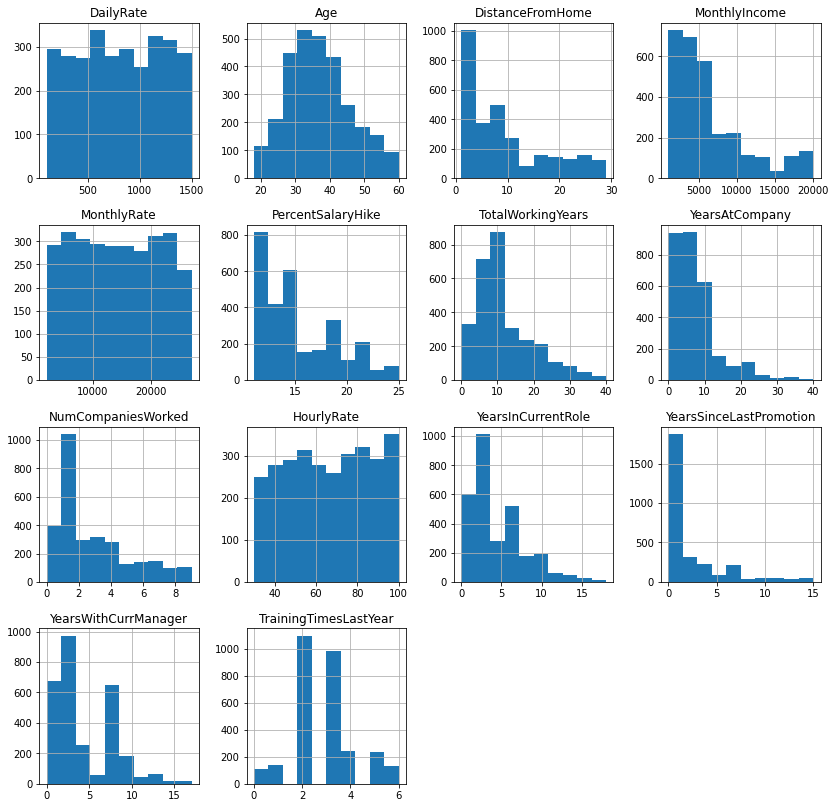

In [ ]:
#creating histograms
employees[num_cols].hist(figsize=(14,14))
plt.show()

**Observations:**

- **The age distribution is close to a normal distribution** with the majority of employees between the ages of 25 and 50.

- **The percentage salary hike is skewed to the right**, which means employees are mostly getting lower percentage salary increases.

- **MonthlyIncome and TotalWorkingYears are skewed to the right**, indicating that the majority of workers are in entry / mid-level positions in the organization.

- **DistanceFromHome also has a right skewed distribution**, meaning most employees live close to work but there are a few that live further away.

- **On average, an employee has worked at 2.5 companies.** Most employees have worked at only 1 company.

- **The YearsAtCompany variable distribution shows a good proportion of workers with 10+ years**, indicating a significant number of loyal employees at the organization.

- **The YearsInCurrentRole distribution has three peaks at 0, 2, and 7.** There are a few employees that have even stayed in the same role for 15 years and more.

- **The YearsSinceLastPromotion variable distribution indicates that some employees have not received a promotion in 10-15 years and are still working in the organization.** These employees are assumed to be high work-experience employees in upper-management roles, such as co-founders, C-suite employees and the like.

- The distributions of DailyRate, HourlyRate and MonthlyRate appear to be uniform and do not provide much information. It could be that daily rate refers to the income earned per extra day worked while hourly rate could refer to the same concept applied for extra hours worked per day. Since these rates tend to be broadly similiar for multiple employees in the same department, that explains the uniform distribution they show.

### Univariate analysis for categorical variables

In [ ]:
#Printing the % sub categories of each category
for i in cat_cols:
    print(employees[i].value_counts(normalize=True))
    print('*'*40)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64
****************************************
No     0.717007
Yes    0.282993
Name: OverTime, dtype: float64
****************************************
Travel_Rarely        0.709524
Travel_Frequently    0.188435
Non-Travel           0.102041
Name: BusinessTravel, dtype: float64
****************************************
Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
Name: Department, dtype: float64
****************************************
3    0.389116
4    0.270748
2    0.191837
1    0.115646
5    0.032653
Name: Education, dtype: float64
****************************************
Life Sciences       0.412245
Medical             0.315646
Marketing           0.108163
Technical Degree    0.089796
Other               0.055782
Human Resources     0.018367
Name: EducationField, dtype: float64
****************************************
4    0.312245
3    0.300680
1    0.196599
2    0.

**Observations:**

- **The employee attrition rate is 16%.**
- **Around 28% of the employees are working overtime.** This number appears to be on the higher side, and might indicate a stressed employee work-life.
- 71% of the employees have traveled rarely, while around 19% have to travel frequently.
- Around 73% of the employees come from an educational background in the Life Sciences and Medical fields.
- Over 65% of employees work in the Research & Development department of the organization.
- **Nearly 40% of the employees have low (1) or medium-low (2) job satisfaction** and environment satisfaction in the organization, indicating that the morale of the company appears to be somewhat low.
- **Over 30% of the employees show low (1) to medium-low (2) job involvement.**
- Over 80% of the employees either have none or very less stock options.
- **In terms of performance ratings, none of the employees have rated lower than 3 (excellent).** About 85% of employees have a performance rating equal to 3 (excellent), while the remaining have a rating of 4 (outstanding). This could either mean that the majority of employees are top performers, or  the more likely scenerio is that the organization could be highly lenient with its performance appraisal process.

### Bivariate and Multivariate analysis

**We have analyzed different categorical and numerical variables.**

**Let's now check how does attrition rate is related with other categorical variables**

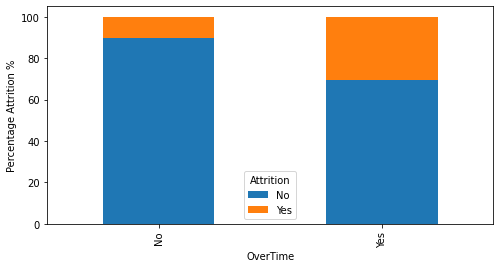

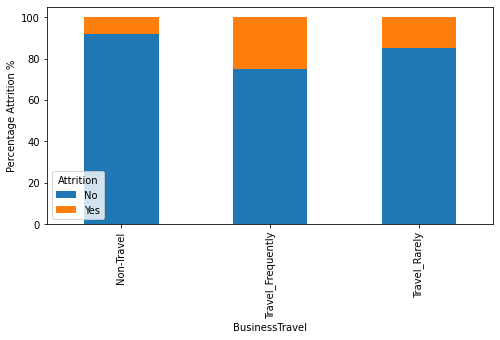

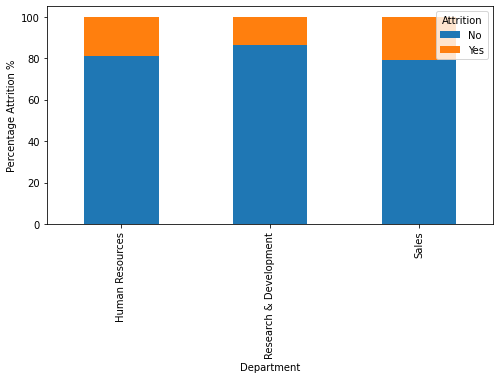

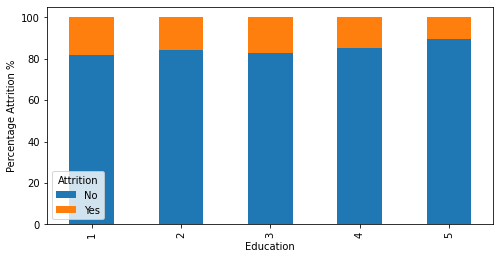

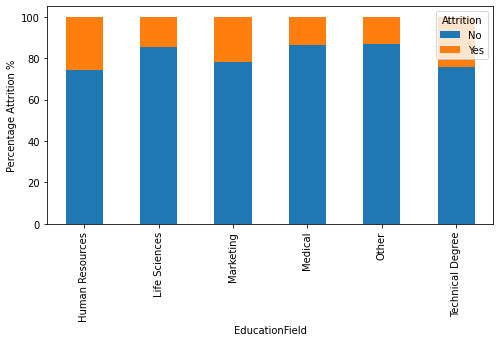

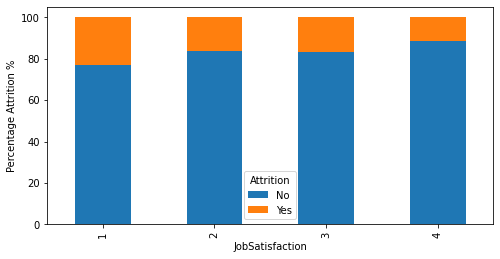

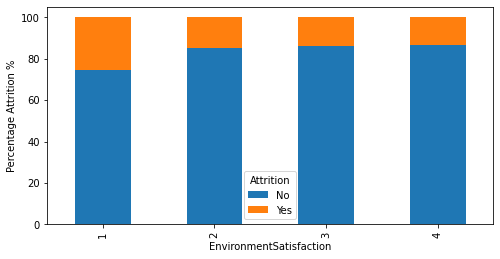

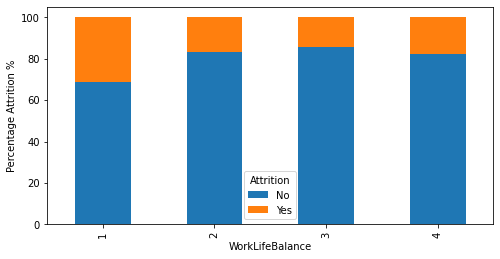

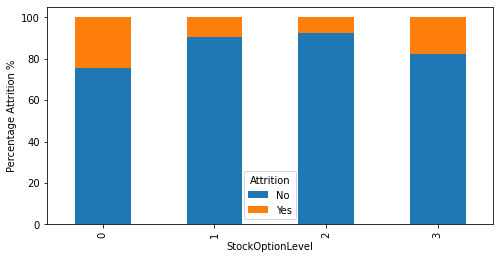

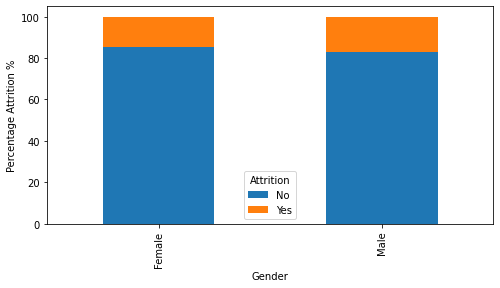

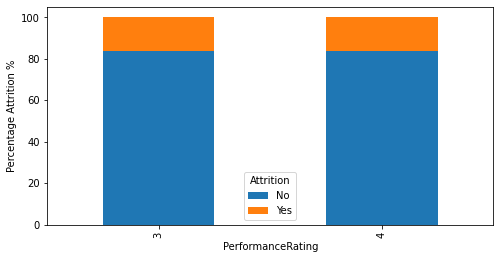

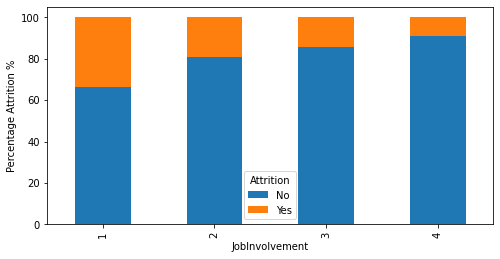

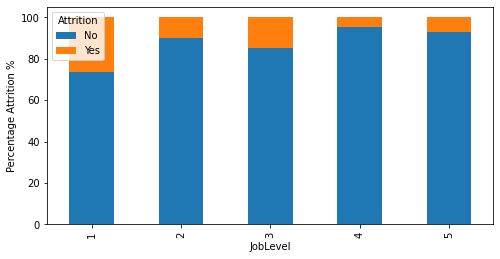

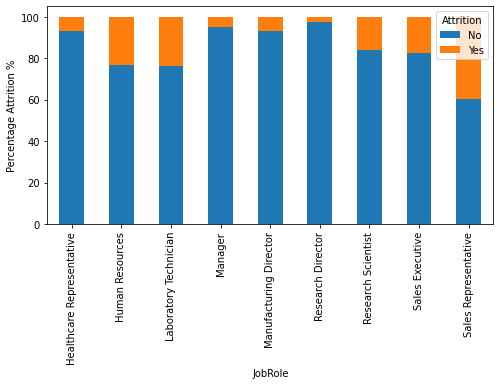

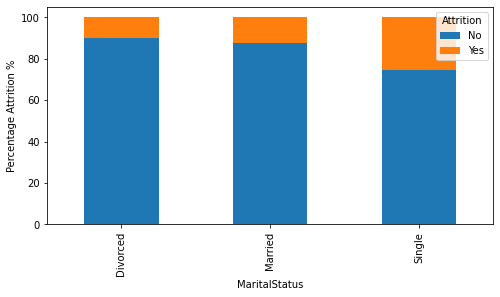

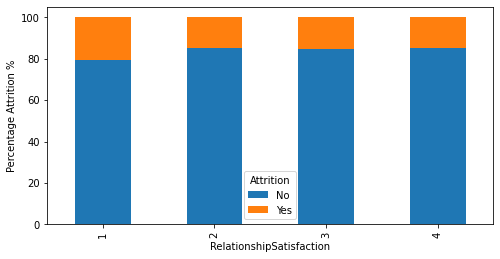

In [ ]:
for i in cat_cols:
    if i!='Attrition':
        (pd.crosstab(employees[i],employees['Attrition'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Percentage Attrition %')

**Observations:**
    
- **Employees working overtime have more than a 30% chance of attrition**,
which is very high compared to the 10% chance of attrition for employees who do not work extra hours.
- As seen earlier, the majority of employees work for the R&D department. The chance of attrition there is ~15%
- **Employees working as sales representatives have an attrition rate of around 40%** while HRs and Technicians have an attrition rate of around 25%. The sales and HR departments have higher attrition rates in comparison to an academic department like Research & Development, an observation that makes intuitive sense keeping in mind the differences in those job profiles. The high-pressure and incentive-based nature of Sales and Marketing roles may be contributing to their higher attrition rates.
- **The lower the employee's job involvement, the higher their attrition chances appear to be, with 1-rated JobInvolvement employees attriting at 35%.** The reason for this could be that employees with lower job involvement might feel left out or less valued and have already started to explore new options, leading to a higher attrition rate.
- **Employees at a lower job level also attrite more,** with 1-rated JobLevel employees showing a nearly 25% chance of attrition. These may be young employees who tend to explore more options in the initial stages of their careers.
- **A low work-life balance rating clearly leads employees to attrite**; 30% of those in the 1-rated category show attrition.

**Let's check the relationship between attrition and Numerical variables**

In [ ]:
#Mean of numerical varibles grouped by attrition
employees.groupby(['Attrition'])[num_cols].mean()

,DailyRate,Age,DistanceFromHome,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,NumCompaniesWorked,HourlyRate,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TrainingTimesLastYear
Attrition,,,,,,,,,,,,,,
No,812.504461,37.561233,8.915653,6832.739659,14265.779400,15.231144,11.862936,7.369019,2.645580,65.952149,4.484185,2.234388,4.367397,2.832928
Yes,750.362869,33.607595,10.632911,4787.092827,14559.308017,15.097046,8.244726,5.130802,2.940928,65.573840,2.902954,1.945148,2.852321,2.624473


**Observations:**
- **Employees leaving the company have a nearly 30% lower average income and 30% lesser work experience than those who are not.** These could be the employees looking to explore new options and/or increase their salary with a company switch.
- **Employees showing attrition also tend to live 16% further from the office than those who are not**. The longer commute to and from work could mean they have to spend more time/money every day, amd this could be leading to job dissatisfaction and wanting to leave the organization.

**We have found out what kind of employees are leaving the company more.**

### Let's check the relationship between different numerical variables

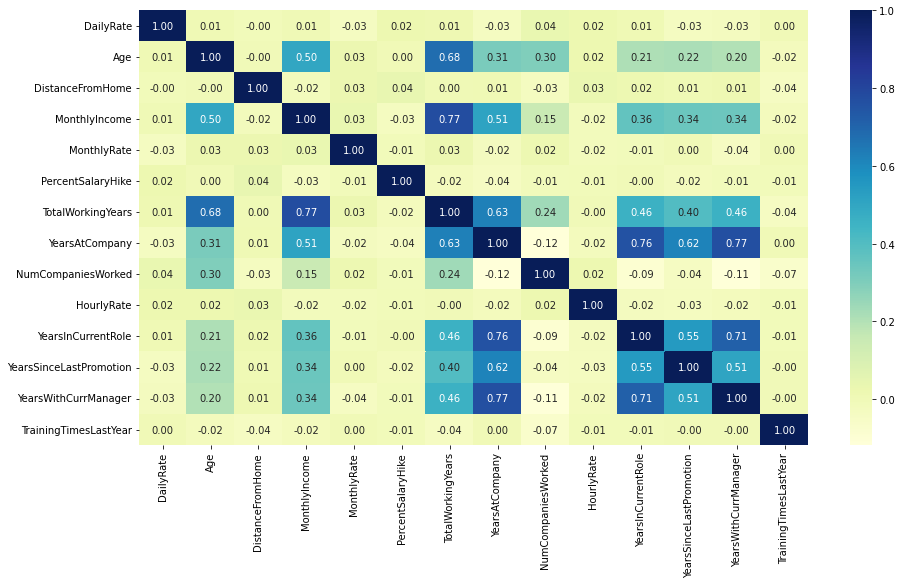

In [ ]:
#plotting the correation between numerical variables
plt.figure(figsize=(15,8))
sns.heatmap(employees[num_cols].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

**Observations:**

- **Total work experience, monthly income, years at company and years with current manager are highly correlated with each other** which is easy to understand as these variables show an increase with age for most employees.
- Years at company and years in current role are correlated with years since last promotion which means that the company is not giving promotions at the right time.

**Now that we have explored our data. Let's build the model**

## Model Building - Approach
1. Prepare data for modeling
2. Partition the data into train and test set.
3. Build model on the train data.
4. Tune the model if required.
5. Test the data on test set.

###  Preparing data for modeling

In [ ]:
employees['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [ ]:
employees['OverTime'].unique()

array([1, 0])

**Creating dummy variables for categorical Variables**

In [ ]:
#creating list of dummy columns
to_get_dummies_for = ['BusinessTravel', 'Department','Education', 'EducationField','EnvironmentSatisfaction', 'Gender',  'JobInvolvement','JobLevel', 'JobRole', 'MaritalStatus' ]

#creating dummy variables
employees = pd.get_dummies(data = employees, columns= to_get_dummies_for, drop_first= True)

#mapping overtime and attrition
dict_OverTime = {'Yes': 1, 'No':0}
dict_attrition = {'Yes': 1, 'No': 0}


employees['OverTime'] = employees.OverTime.map(dict_OverTime)
employees['Attrition'] = employees.Attrition.map(dict_attrition)

In [ ]:
employees.head()

,EmployeeNumber,Attrition,Age,DailyRate,DistanceFromHome,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,1,1,41,1102,1,94,4,5993,19479,8,...,0,0,0,0,0,0,1,0,0,1
1,2,0,49,279,8,61,2,5130,24907,1,...,0,0,0,0,0,1,0,0,1,0
2,3,1,37,1373,2,92,3,2090,2396,6,...,0,1,0,0,0,0,0,0,0,1
3,4,0,33,1392,3,56,3,2909,23159,1,...,0,0,0,0,0,1,0,0,1,0
4,5,0,27,591,2,40,2,3468,16632,9,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
employees['OverTime'].head()

0    1
1    0
2    1
3    1
4    0
Name: OverTime, dtype: int64

**Separating the independent variables (X) and the dependent variable (Y)**

In [ ]:
#Separating target variable and other variables
Y= employees.Attrition
X= employees.drop(columns = ['Attrition'])

### Scaling the data

The independent variables in this dataset have different scales. When features have differing scales from each other, there is a chance that a higher weightage will be given to features which have a higher magnitude, and they will dominate over other features whose magnitude changes may be smaller but whose percentage changes may be just as significant or even larger. This will impact the performance of our machine learning algorithm, and we do not want our algorithm to be biased towards one feature.

The solution to this issue is **Feature Scaling**, i.e. scaling the dataset so as to give every transformed variable a comparable scale.

In this problem, we will use the **Standard Scaler** method, which centers and scales the dataset using the Z-Score.

It standardizes features by subtracting the mean and scaling it to have unit variance.

The standard score of a sample x is calculated as:

**z = (x - u) / s**

where **u** is the mean of the training samples (zero) and **s** is the standard deviation of the training samples.

In [ ]:
#Scaling the data
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled, columns=X.columns)

### Problem 1. Splitting the data into 70% train and 30% test set

Some classification problems can exhibit a large imbalance in the distribution of the target classes: for instance there could be several times more negative samples than positive samples. In such cases it is recommended to use the **stratified sampling** technique to ensure that relative class frequencies are approximately preserved in each train and validation fold.

**1.a.** Complete the code to split the data into 70% training and 30% testing data. Use `stratify=y` to preserve relative class frequencies.

In [ ]:
#splitting the data
x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.3,random_state=1,stratify=Y)

### Problem 2. Model evaluation criterion

#### The model can make two types of wrong predictions:
1. Predicting an employee will attrite when the employee doesn't attrite
2. Predicting an employee will not attrite and the employee actually attrites

**2.a. What are the consequeces of predicting that the employee will not attrite but the employee attrites?**        
*  ------- losing out on a valuable employee or asset. This would be considered a major miss for any employee attrition predictor, and is hence the more important case of wrong predictions.

**2.b.**
**Why would the company want to maximize the Recall of the model?**
* -------- The greater the Recall, the higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall (minimizing the false negatives) or in other words identifying the true positives (i.e. Class 1) very well, so that the company can provide incentives to control attrition rate especially for top-performers. This would help in optimizing the overall project cost towards retaining the best talent.

Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.

In [ ]:
#creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Attrite', 'Attrite'], yticklabels=['Not Attrite', 'Attrite'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### Problem 3. Logistic Regression Model

- Logistic Regression is a supervised learning algorithm which is used for **binary classification problems** i.e. where the dependent variable is categorical and has only two possible values. In logistic regression, we use the sigmoid function to calculate the probability of an event y, given some features x as:

                                          P(y)=1/exp(1 + exp(-x))

**3.a.** Instantiate the logistic regression model as `lg`.      


In [ ]:
#fitting logistic regression model
# 3.a. Instantiate the model
lg=LogisticRegression()



**3.b.** Fit the model to the training data.

In [ ]:
# 3.b. fit the model to the training data
lg.fit(x_train,y_train)

LogisticRegression()


**3.c. Checking model performance (train)**  
 Check the model performance on the training data. Use the `metrics_score` function built above.

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1726
           1       0.81      0.50      0.62       332

    accuracy                           0.90      2058
   macro avg       0.86      0.74      0.78      2058
weighted avg       0.89      0.90      0.89      2058



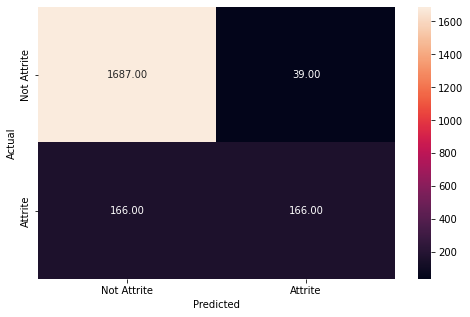

In [ ]:
#checking the performance on the training data
y_pred_train = lg.predict(x_train)
metrics_score(y_train, y_pred_train)


**3.d. Checking model performance (test)**     
Check the model performance on the testing data. Use the `metrics_score` function built above.

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       740
           1       0.76      0.46      0.58       142

    accuracy                           0.89       882
   macro avg       0.83      0.72      0.76       882
weighted avg       0.88      0.89      0.88       882



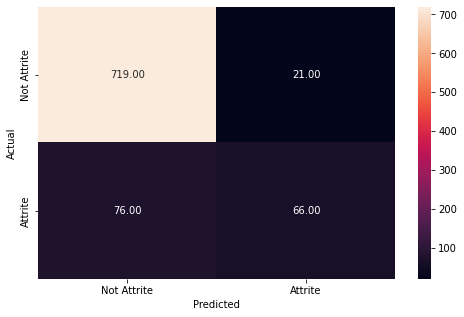

In [ ]:
#checking the performance on the test dataset
y_pred_test = lg.predict(x_test)
metrics_score(y_test, y_pred_test)

**3.e. Share 3 to 4 observations based on the metrics generated above.**

**Observations:**
- **We are getting an accuracy of around 90%** on train and test dataset.
- However, **the recall for this model is only around 50% for class 1 on train and 46% on test.**
- As the recall is low, **this model will not perform well** in differentiating out those employees who have a high chance of leaving the company, meaning it will eventually not help in reducing the attrition rate.
- As we can see from the Confusion Matrix, **this model fails to identify the majority of employees who are at risk of attrition.**

**Let's check the coefficients and find which variables are leading to attrition and which can help to reduce the attrition**

In [ ]:
#printing the coefficients of logistic regression
cols=X.columns

coef_lg=lg.coef_

pd.DataFrame(coef_lg,columns=cols).T.sort_values(by=0,ascending=False)

,0
OverTime,0.958034
BusinessTravel_Travel_Frequently,0.716046
MaritalStatus_Single,0.618145
YearsSinceLastPromotion,0.552935
YearsAtCompany,0.523238
NumCompaniesWorked,0.501137
Department_Sales,0.483346
Department_Research & Development,0.482820
BusinessTravel_Travel_Rarely,0.441384
DistanceFromHome,0.384346


**Observations:**


**Features which string positive affect on the attrition rate are:**
- OverTime
- BusinessTravel_Travel_Frequently
- Department_Research & Development
- JobRole_Sales Executive
- MaritalStatus_Single
- Department_Sales
- NumCompaniesWorked
- YearsSinceLastPromotion
- JobLevel_5
- BusinessTravel_Travel_Rarely
- DistanceFromHome
- YearsAtCompany
- JobRole_Human Resources
- JobRole_Sales Representative

**Features which string negative affect on the attrition rate are:**
- MonthlyIncome
- JobInvolvement_3
- JobLevel_2
- EnvironmentSatisfaction_4
- JobInvolvement_4
- JobInvolvement_2
- EnvironmentSatisfaction_3
- EducationField_Life Sciences
- EnvironmentSatisfaction_2
- YearsWithCurrManager
- JobRole_Research Director
- TotalWorkingYears
- JobSatisfaction

**The features identified as important are similar for both the Tree model and the logistic regression model. Notice that we are able to see a bit more detail in the logistic regression results with the + and - contributions.**

The coefficients of the logistic regression model give us the log of odds, which is hard to interpret in the real world. We can convert the log of odds into real odds by taking its exponential.

In [ ]:
odds = np.exp(lg.coef_[0]) #finding the odds

# adding the odds to a dataframe and sorting the values
pd.DataFrame(odds, x_train.columns, columns=['odds']).sort_values(by='odds', ascending=False)

,odds
OverTime,2.606567
BusinessTravel_Travel_Frequently,2.046326
MaritalStatus_Single,1.855483
YearsSinceLastPromotion,1.738348
YearsAtCompany,1.687483
NumCompaniesWorked,1.650597
Department_Sales,1.621491
Department_Research & Development,1.620638
BusinessTravel_Travel_Rarely,1.554858
DistanceFromHome,1.468653


### Problem 4. Meaning of Coefficients
- EXAMPLE: **The odds of an employee working overtime to attrite are *2.6 times* the odds of one who is not, probably due to the fact that working overtime is not sustainable for an extended duration for any employee, and may lead to burnout and job dissatisfaction.**
     
- **4.a.** What is the impact of frquent travel on the odds that an employee will attrite? **- The odds of an employee travelling frequently to attrite are *double* the odds of an employee who doesn't travel as often.**    

- **4.b.** What is the impact of marital status on the odds that an employee will attrite? **The odds of single employees attriting are *1.8 times (80% higher than)* the odds of an employee with another marital status.**   


**Precision-Recall Curve for logistic regression**

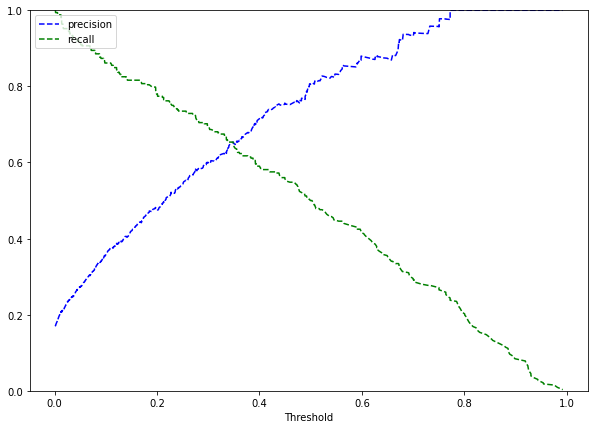

In [ ]:
y_scores_lg=lg.predict_proba(x_train) #predict_proba gives the probability of each observation belonging to each class


precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1])

#Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

**Observation:**
- We can see that precision and recall are balanced for a threshold of about ~**0.35**.

**Let's find out the performance of the model at this threshold**

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1726
           1       0.65      0.64      0.64       332

    accuracy                           0.89      2058
   macro avg       0.79      0.79      0.79      2058
weighted avg       0.89      0.89      0.89      2058



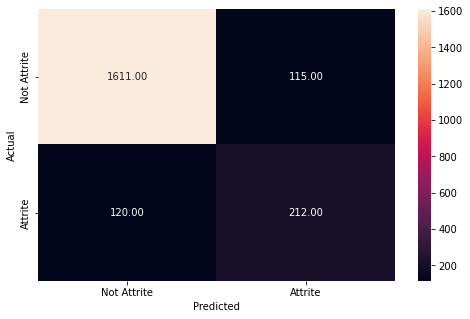

In [ ]:
optimal_threshold1=.35
y_pred_train = lg.predict_proba(x_train)
metrics_score(y_train, y_pred_train[:,1]>optimal_threshold1)

- **The model performance has improved. The recall has increased significantly for class 1.**
- Let's check the performance on the test data.

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       740
           1       0.62      0.63      0.63       142

    accuracy                           0.88       882
   macro avg       0.78      0.78      0.78       882
weighted avg       0.88      0.88      0.88       882



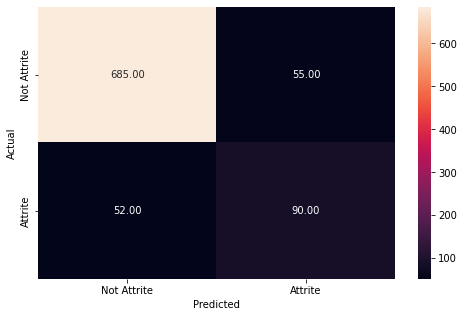

In [ ]:
optimal_threshold1=.35
y_pred_test = lg.predict_proba(x_test)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold1)